# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [1]:
# Import data libraries, graph and timers
import pandas as pd
import matplotlib.pyplot as plt
import timeit
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [2]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [3]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


Weryfikacja:

In [4]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [5]:
cg = CaseGenerator()
q_int = [10000*val for val in range(1, 11)]
q_2int = [(val//2, val//2) for val in q_int]
q_grid = [(100, val//100) for val in q_int]
q_clust = [val//3 for val in q_int]
q_out = [(val, 50) for val in q_int]

def benchmark(func, quantities, search_in=Rectangle([25, 25], [75, 75]), destination=Rectangle(Point([0,0]), Point([100,100])), cluster=None, title="Benchmark"):
    global q_int
    data = []
    data2 = []
    for q in quantities:
        if cluster is not None:
            points = func(q, cluster)
        else:
            points = func(q, destination)
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=1)
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1), number=1)
        kd = KdTree(points, points_in_node=1)
        qt = QuadTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(search_in), number=1)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(search_in), number=1)
        data.append([tkk, tqk])
        data2.append([tks, tqs])
    qua = ["Liczba punktów"]    
    col = ["KdTree", "QuadTree"]
    top = ["", "Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, len(quantities) + 1))
    df = pd.concat([pd.concat([pd.DataFrame(q_int, columns=qua, index=idx), 
                    pd.DataFrame(data, columns=col, index=idx), 
                    pd.DataFrame(data2, columns=col, index=idx)], axis=1, keys=top)], axis=1, keys=[title])
    return df


2.1 Rozkład jednorodny

In [6]:
df1 = benchmark(cg.uniform_distribution, q_int, title="Rozkład jednorodny")
df1.to_latex("uniform.tex")
df1

Rozkład jednorodny                                                         \
                      Czas konstrukcji [s]           Czas przeszukiwania [s]   
       Liczba punktów               KdTree  QuadTree                  KdTree   
1               10000             0.254293  0.256709                0.002978   
2               20000             0.573294  0.354011                0.005656   
3               30000             0.499879  0.537304                0.005561   
4               40000             0.700145  0.750672                0.006905   
5               50000             0.898189  0.909258                0.007318   
6               60000             1.072214  1.096267                0.008159   
7               70000             1.386933  1.499516                0.011053   
8               80000             1.458071  1.466071                0.011826   
9               90000             1.715803  1.662915                0.017121   
10             100000             2.850499  2.348395                0.017503   

              
              
    QuadTree  
1   0.004087  
2   0.006830  
3   0.011753  
4   0.014303  
5   0.015734  
6   0.019597  
7   0.022332  
8   0.026181  
9   0.043381  
10  0.044483

2.2 Rozkład normalny

In [7]:
df2 = benchmark(cg.normal_distribution, q_int, title="Rozkład normalny")
df2.to_latex("normal.tex")
df2

Rozkład normalny                                                         \
                    Czas konstrukcji [s]           Czas przeszukiwania [s]   
     Liczba punktów               KdTree  QuadTree                  KdTree   
1             10000             0.307410  0.179338                0.005702   
2             20000             0.486181  0.469323                0.010081   
3             30000             0.510720  0.553495                0.011798   
4             40000             0.730051  0.765140                0.014775   
5             50000             0.934109  0.954508                0.015281   
6             60000             1.107914  1.197500                0.017474   
7             70000             1.439145  1.390671                0.018722   
8             80000             1.520500  1.561288                0.020714   
9             90000             1.733495  1.791401                0.025427   
10           100000             3.383783  2.632845                0.025007   

              
              
    QuadTree  
1   0.009776  
2   0.015710  
3   0.021921  
4   0.032764  
5   0.042740  
6   0.050559  
7   0.057141  
8   0.067736  
9   0.080744  
10  0.099713

2.3 Rozkład "posadzka"

In [8]:
df3 = benchmark(cg.grid_distribution, q_grid, title="Rozkład siatka")
df3.to_latex("grid.tex")
df3

Rozkład siatka                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1           10000             0.210939  0.123265                0.003781   
2           20000             0.344990  0.568616                0.005890   
3           30000             0.579619  0.502263                0.007789   
4           40000             0.820060  0.734268                0.011402   
5           50000             1.037543  0.920040                0.011753   
6           60000             1.271267  1.140203                0.013617   
7           70000             1.483790  1.335877                0.014213   
8           80000             1.727996  1.533059                0.016079   
9           90000             1.981248  1.763446                0.017179   
10         100000             2.208517  2.015180                0.023188   

              
              
    QuadTree  
1   0.003394  
2   0.007374  
3   0.009652  
4   0.012923  
5   0.013096  
6   0.014210  
7   0.015466  
8   0.017501  
9   0.019545  
10  0.027285

2.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze) 

In [9]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_1 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([9, 9], [70, 51]), cluster=c, title="Rozkład klastrowy (1)")
df4_1.to_latex("cluster1.tex")
df4_1

Rozkład klastrowy (1)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             0.191749  0.170904   
2                  20000             0.305058  0.554963   
3                  30000             0.475340  0.541607   
4                  40000             0.675428  0.734016   
5                  50000             0.855303  0.951216   
6                  60000             1.042170  1.169894   
7                  70000             1.242337  1.345791   
8                  80000             1.456332  1.560497   
9                  90000             1.663559  1.794227   
10                100000             1.878674  1.980954   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.004093  0.001016  
2                 0.005747  0.001432  
3                 0.008864  0.002569  
4                 0.010361  0.002250  
5                 0.012703  0.002401  
6                 0.011122  0.004383  
7                 0.012918  0.003081  
8                 0.014107  0.003074  
9                 0.014211  0.005211  
10                0.015139  0.003779

2.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

In [10]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_2 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([40, 20], [100, 70]), cluster=c, title="Rozkład klastrowy (2)")
df4_2.to_latex("cluster2.tex")
df4_2

Rozkład klastrowy (2)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             0.226308  0.180917   
2                  20000             0.307349  0.628736   
3                  30000             0.478819  0.545189   
4                  40000             0.661292  0.760471   
5                  50000             0.856093  0.944919   
6                  60000             1.051551  1.141171   
7                  70000             1.258583  1.353262   
8                  80000             1.446511  1.550423   
9                  90000             1.663701  1.779883   
10                100000             1.867288  1.991273   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.003985  0.003392  
2                 0.007473  0.006272  
3                 0.008717  0.009082  
4                 0.008999  0.013453  
5                 0.008975  0.020450  
6                 0.012584  0.022550  
7                 0.013897  0.027153  
8                 0.014127  0.031862  
9                 0.016068  0.037376  
10                0.017432  0.039515

2.5.1 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

In [11]:
df5_1 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([0,10], [90,20]), title="Rozkład z odstającymi (1)")
df5_1.to_latex("outliers1.tex")
df5_1

Rozkład z odstającymi (1)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             0.220899  0.181822   
2                      20000             0.545149  0.353767   
3                      30000             0.508308  0.548618   
4                      40000             0.707333  0.752912   
5                      50000             0.898107  0.952013   
6                      60000             1.093404  1.163824   
7                      70000             1.633291  1.386666   
8                      80000             1.529199  1.568831   
9                      90000             1.741112  1.777286   
10                    100000             1.976554  1.993981   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.002189  0.000189  
2                 0.002974  0.000209  
3                 0.003588  0.000248  
4                 0.004205  0.000274  
5                 0.004623  0.000116  
6                 0.011970  0.000518  
7                 0.006646  0.000204  
8                 0.006069  0.000248  
9                 0.006563  0.000193  
10                0.008583  0.000242

2.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

In [12]:
df5_2 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([40,40], [80,70]), title="Rozkład z odstającymi (2)")
df5_2.to_latex("outliers2.tex")
df5_2

Rozkład z odstającymi (2)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             0.216113  0.182780   
2                      20000             0.602213  0.354038   
3                      30000             0.504764  0.550171   
4                      40000             0.699928  0.775927   
5                      50000             0.901977  0.954206   
6                      60000             1.091539  1.160933   
7                      70000             1.297878  1.368462   
8                      80000             1.534213  1.588868   
9                      90000             1.746149  1.799964   
10                    100000             1.970869  2.014809   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.006141  0.005599  
2                 0.007790  0.010178  
3                 0.007408  0.016544  
4                 0.014108  0.032557  
5                 0.009670  0.026975  
6                 0.012848  0.034163  
7                 0.014065  0.035003  
8                 0.014869  0.042228  
9                 0.018360  0.048729  
10                0.017521  0.054486

2.6 Rozkład krzyżowy

In [13]:
df6 = benchmark(cg.cross_distribution, q_2int, search_in=Rectangle([40,25], [75, 60]), title="Rozkład krzyż")
df6.to_latex("cross.tex")
df6

Rozkład krzyż                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1           10000             0.321588  0.294023                0.030517   
2           20000             0.540019  0.587274                0.062938   
3           30000             0.836905  0.928370                0.072440   
4           40000             1.146358  1.243234                0.127358   
5           50000             1.949131  2.024070                0.202831   
6           60000             2.541127  2.601330                0.192053   
7           70000             3.251174  9.314077                0.229877   
8           80000             2.929727  2.702031                0.306092   
9           90000             3.113884  2.874304                0.286337   
10         100000             3.338727  3.413944                0.332309   

              
              
    QuadTree  
1   0.002657  
2   0.006664  
3   0.009444  
4   0.011769  
5   0.017431  
6   0.015639  
7   0.023720  
8   0.046990  
9   0.029583  
10  0.024823

2.7 Rozkład prostokątny

In [14]:
df7 = benchmark(cg.rectangle_distribution, q_int, search_in=Rectangle([20,20], [70,100]), title="Rozkład prostokąt")
df7.to_latex("rectangle.tex")
df7

Rozkład prostokąt                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1              10000             0.393361  0.339513                0.028751   
2              20000             0.610191  0.708180                0.000403   
3              30000             1.042135  0.959786                0.029791   
4              40000             1.149186  1.381383                0.075948   
5              50000             1.581631  1.646220                0.046789   
6              60000             1.744232  1.909774                0.138827   
7              70000             3.019133  2.347626                0.066997   
8              80000             2.708863  2.834289                0.175925   
9              90000             3.602016  3.552070                0.149231   
10            100000             3.361451  3.923124                0.286940   

              
              
    QuadTree  
1   0.001121  
2   0.001934  
3   0.002684  
4   0.003791  
5   0.004452  
6   0.009493  
7   0.006557  
8   0.007354  
9   0.010585  
10  0.012712

## 3. Generowanie wykresów

In [15]:
def show_graphs(df, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["KdTree"], label="KdTree", marker="o")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba punktów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["KdTree"], label="KdTree", marker="o")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba punktów")
    ax2.legend()
    plt.show()    

3.1 Rozkład równomierny

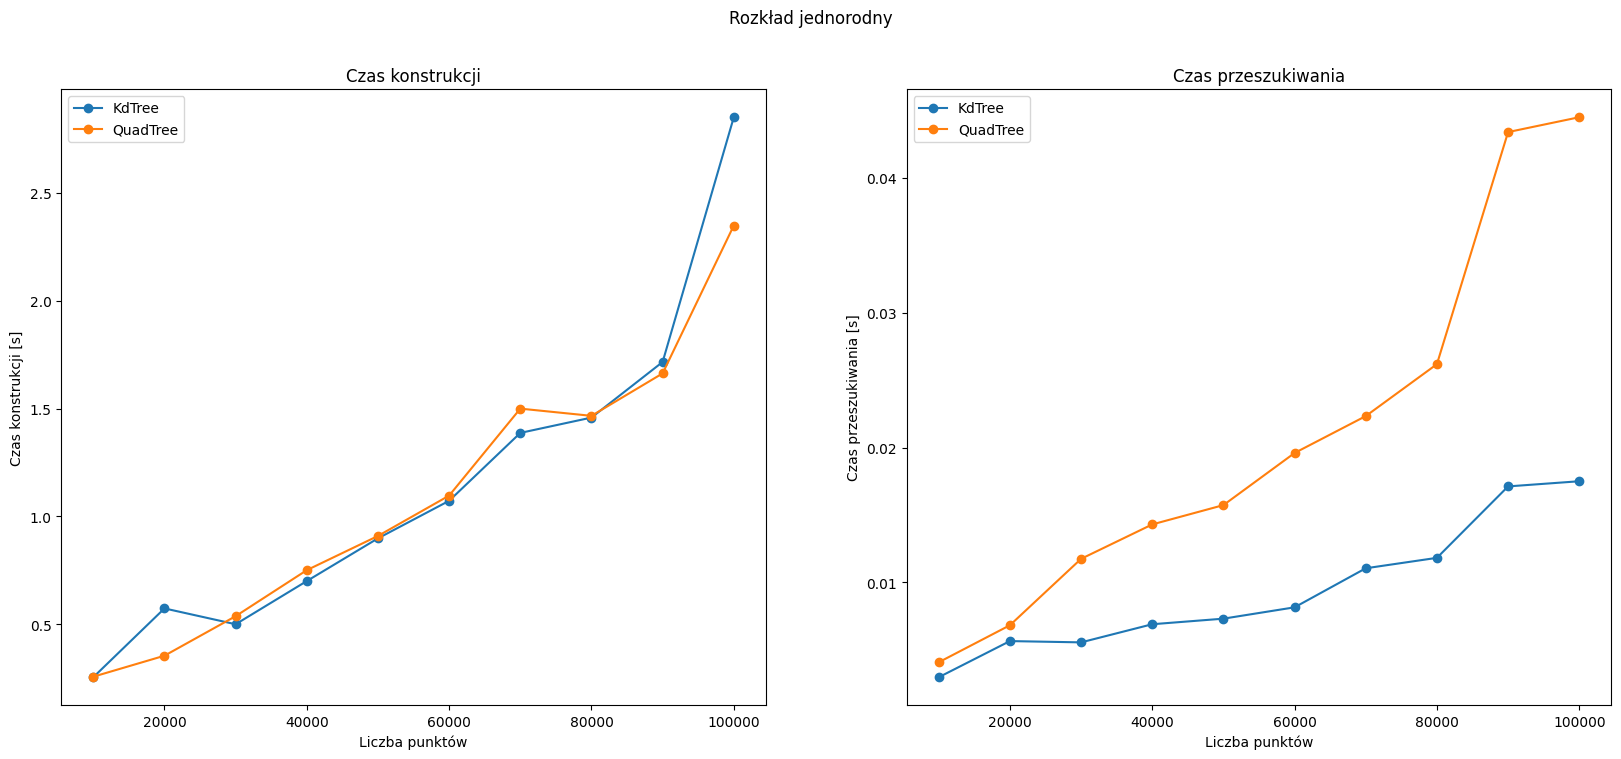

In [16]:
show_graphs(df1, "Rozkład jednorodny")

3.2 Rozkład normalny

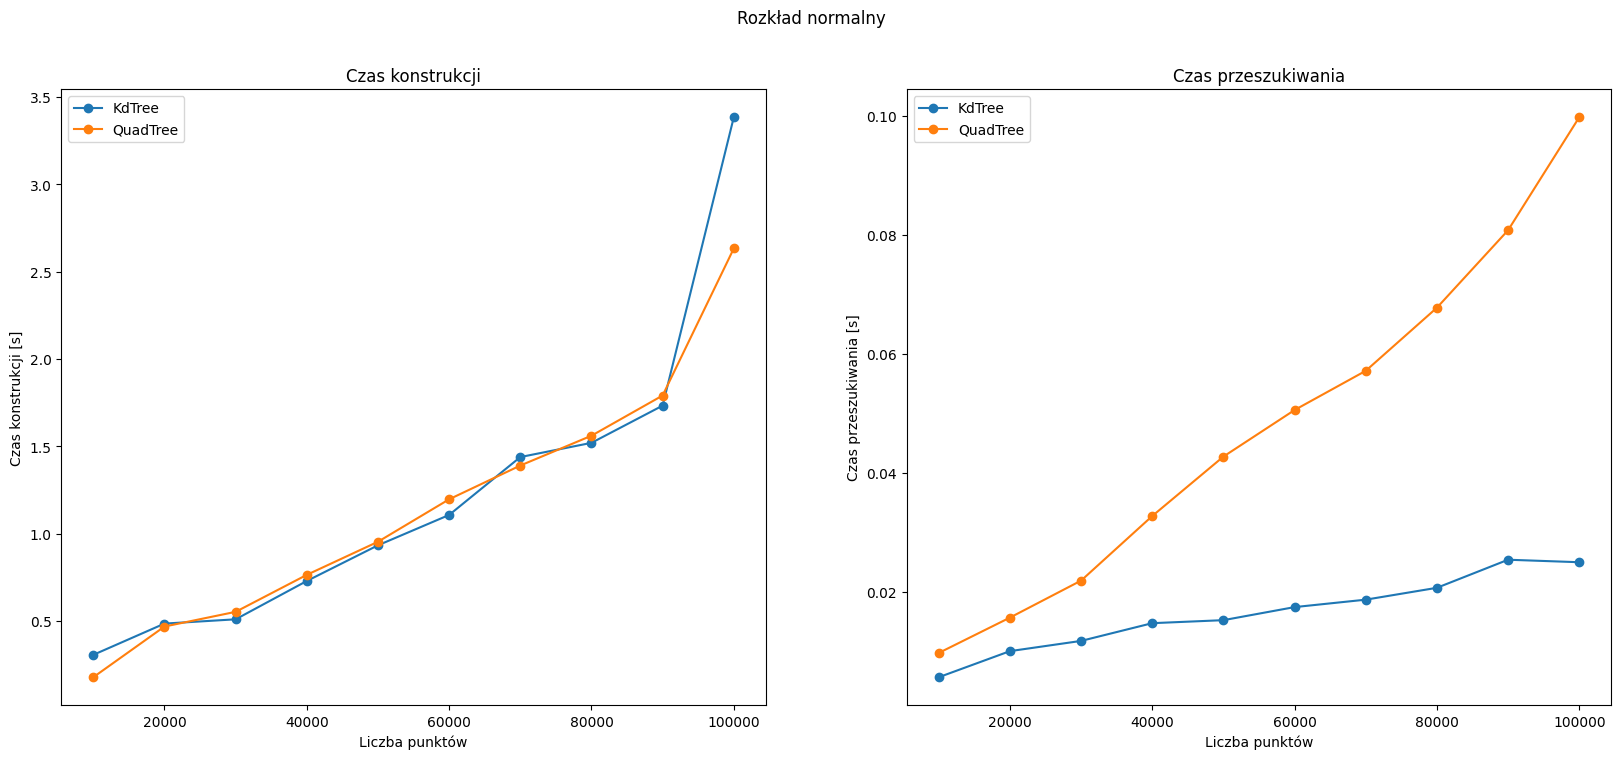

In [17]:
show_graphs(df2, "Rozkład normalny")

3.3 Rozkład "posadzka"

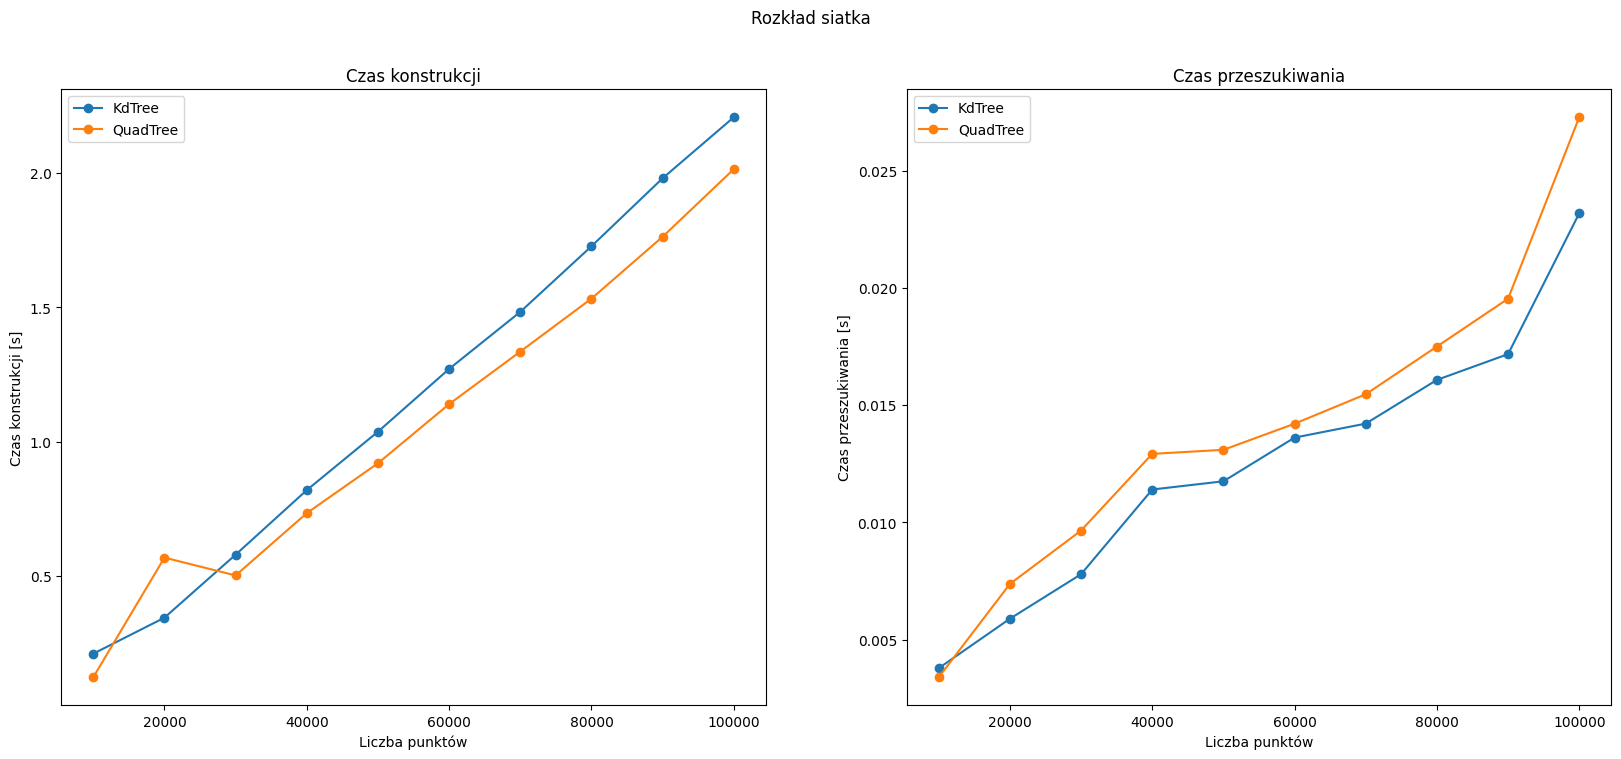

In [18]:
show_graphs(df3, "Rozkład siatka")

3.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze)

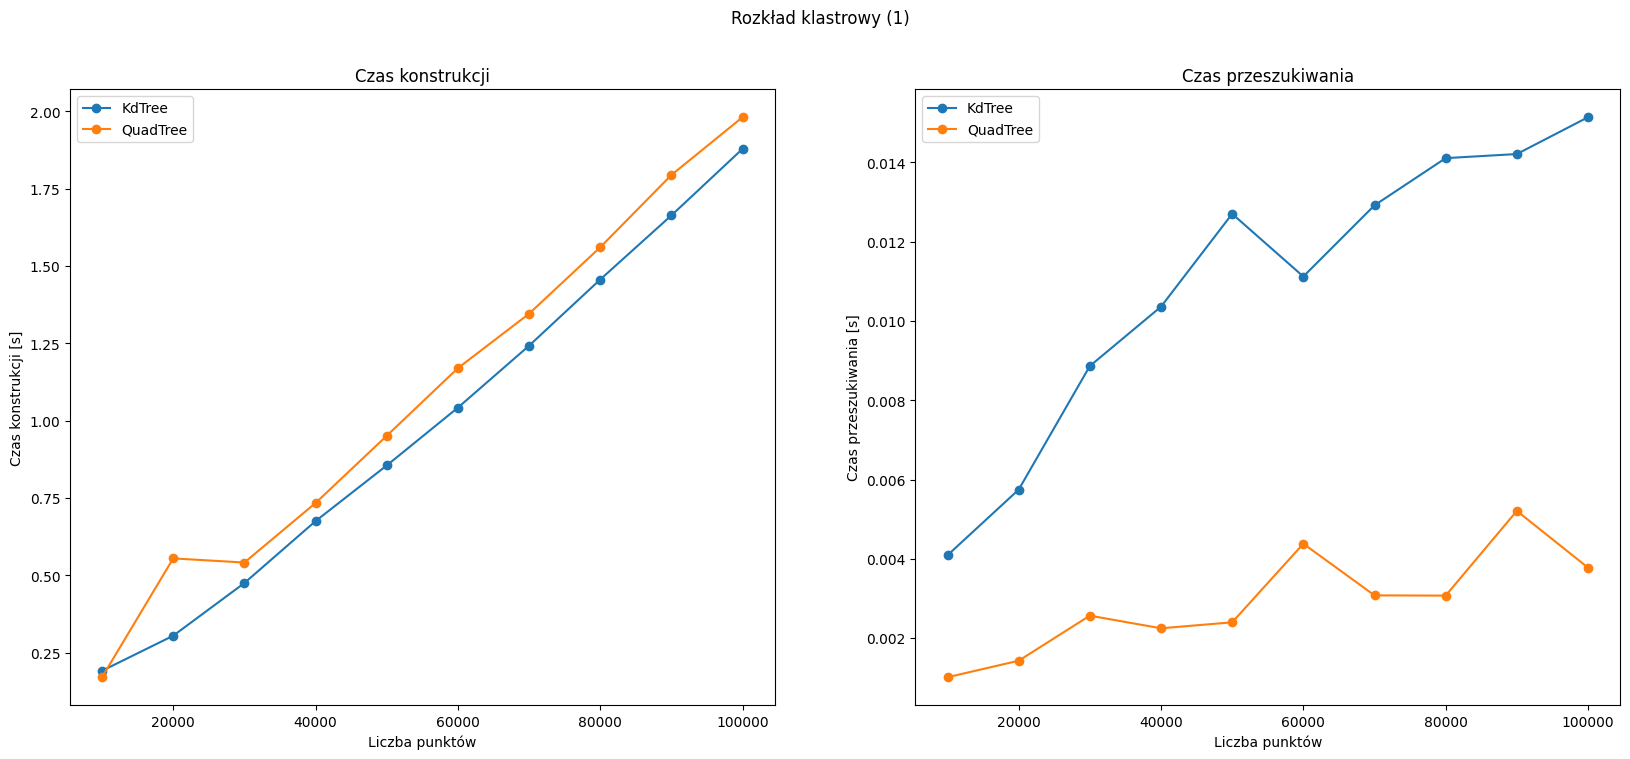

In [19]:
show_graphs(df4_1, "Rozkład klastrowy (1)")

3.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

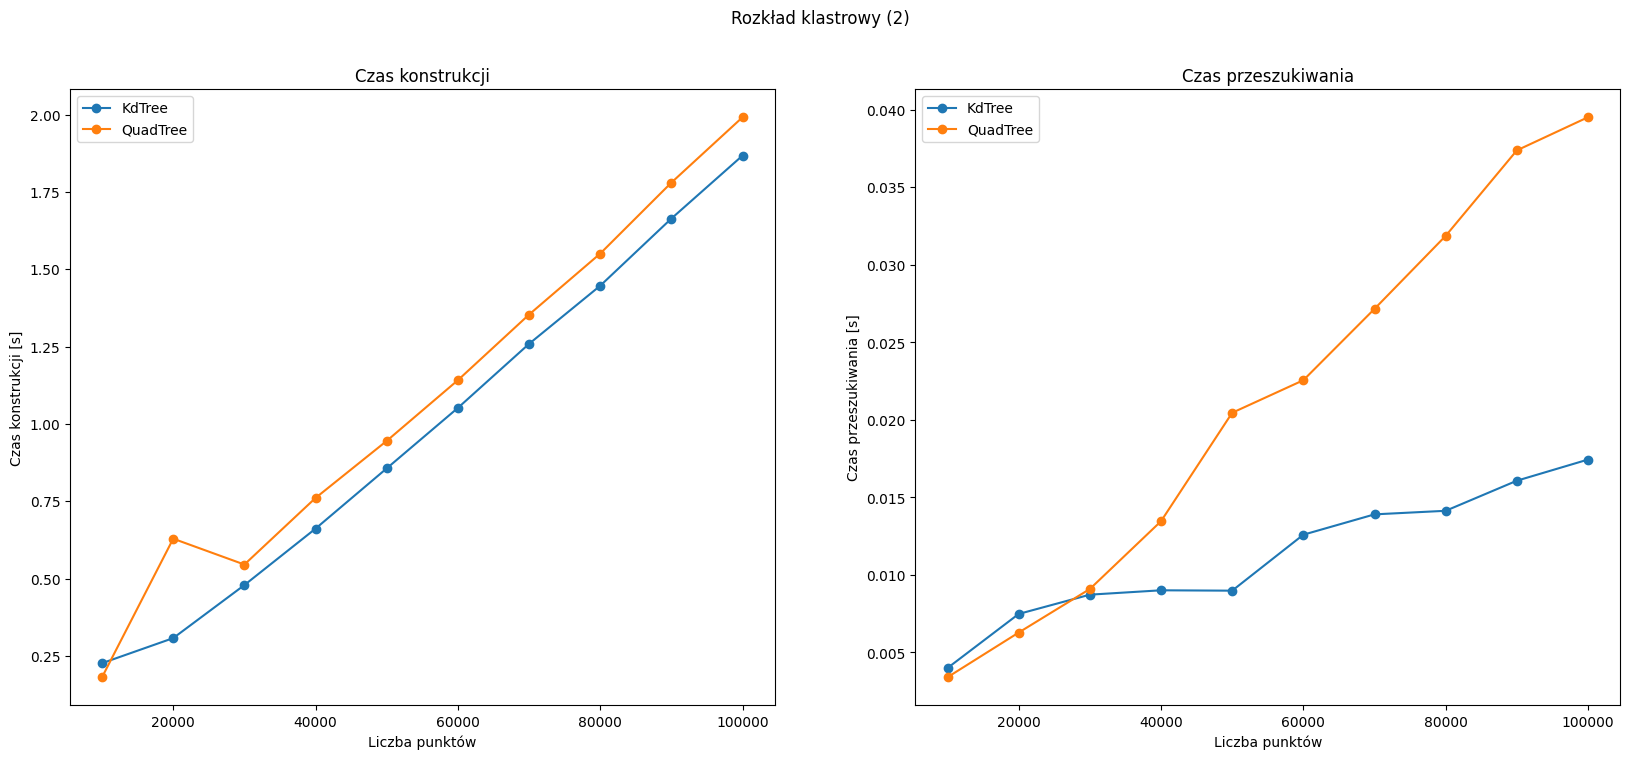

In [20]:
show_graphs(df4_2, "Rozkład klastrowy (2)")

3.5 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

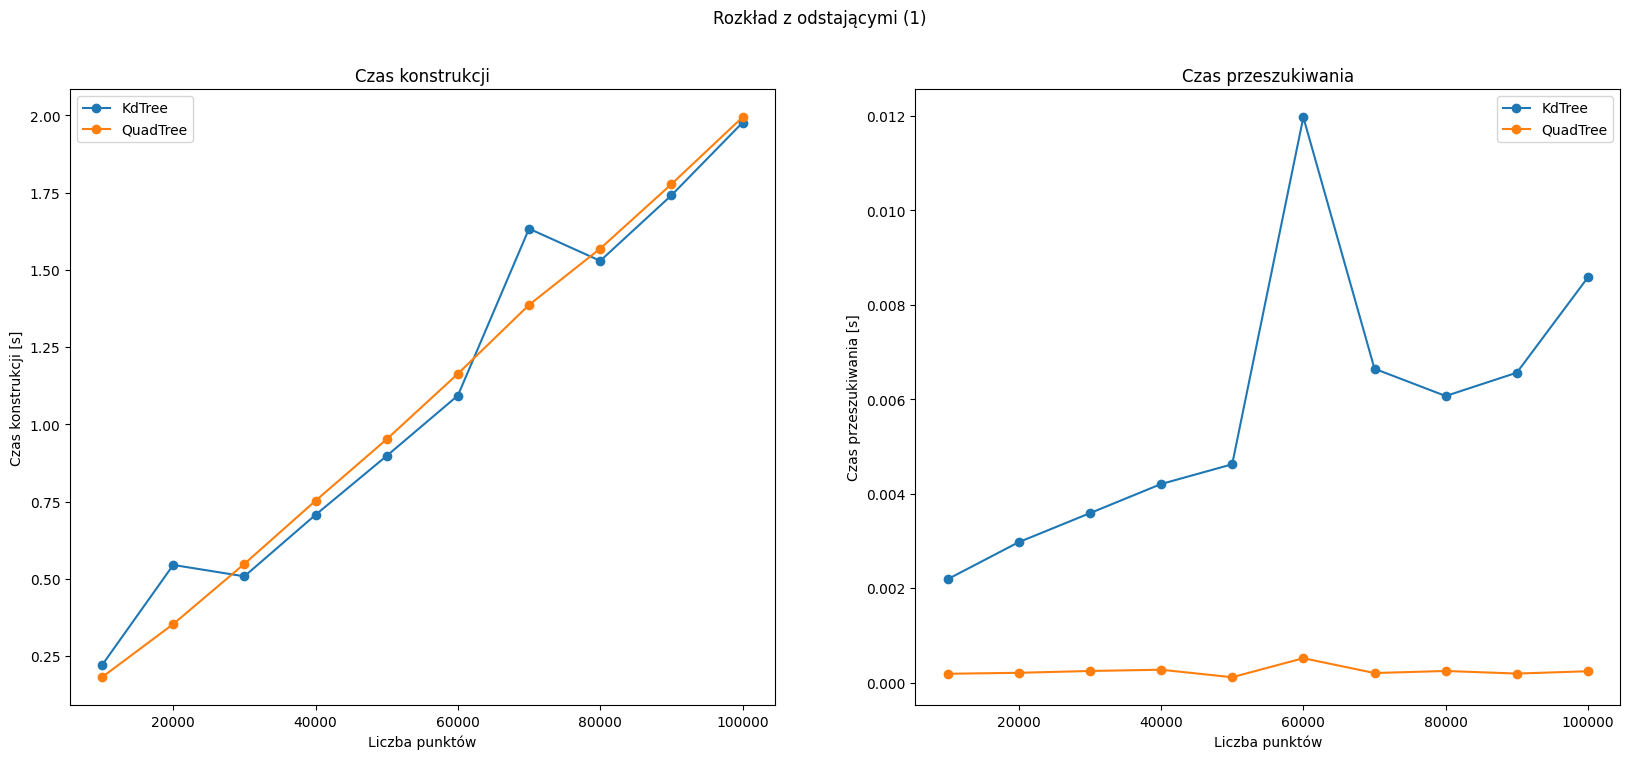

In [21]:
show_graphs(df5_1, "Rozkład z odstającymi (1)")

3.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

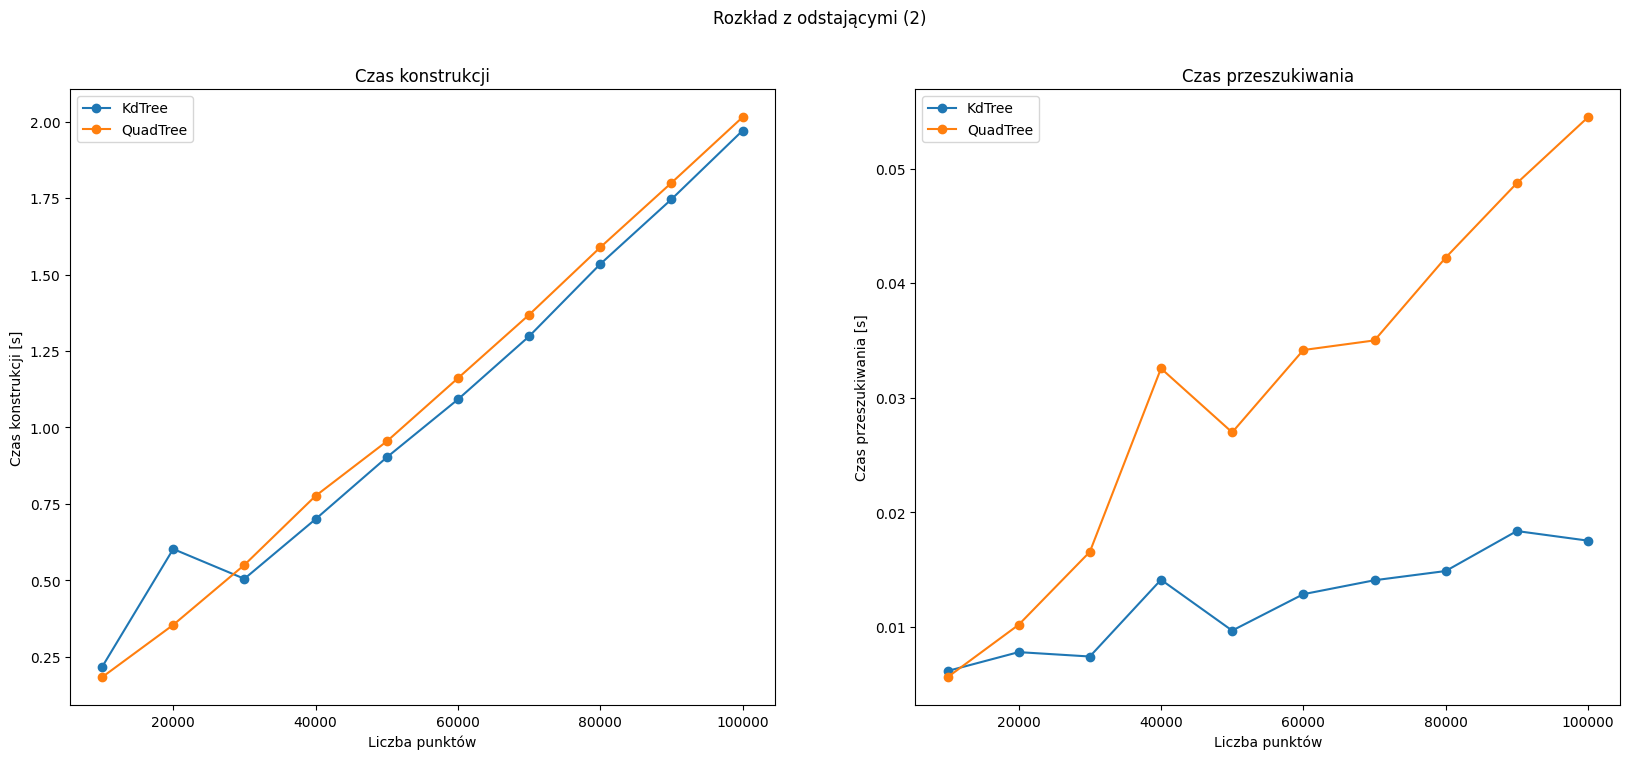

In [22]:
show_graphs(df5_2, "Rozkład z odstającymi (2)")

3.6 Rozkład krzyżowy

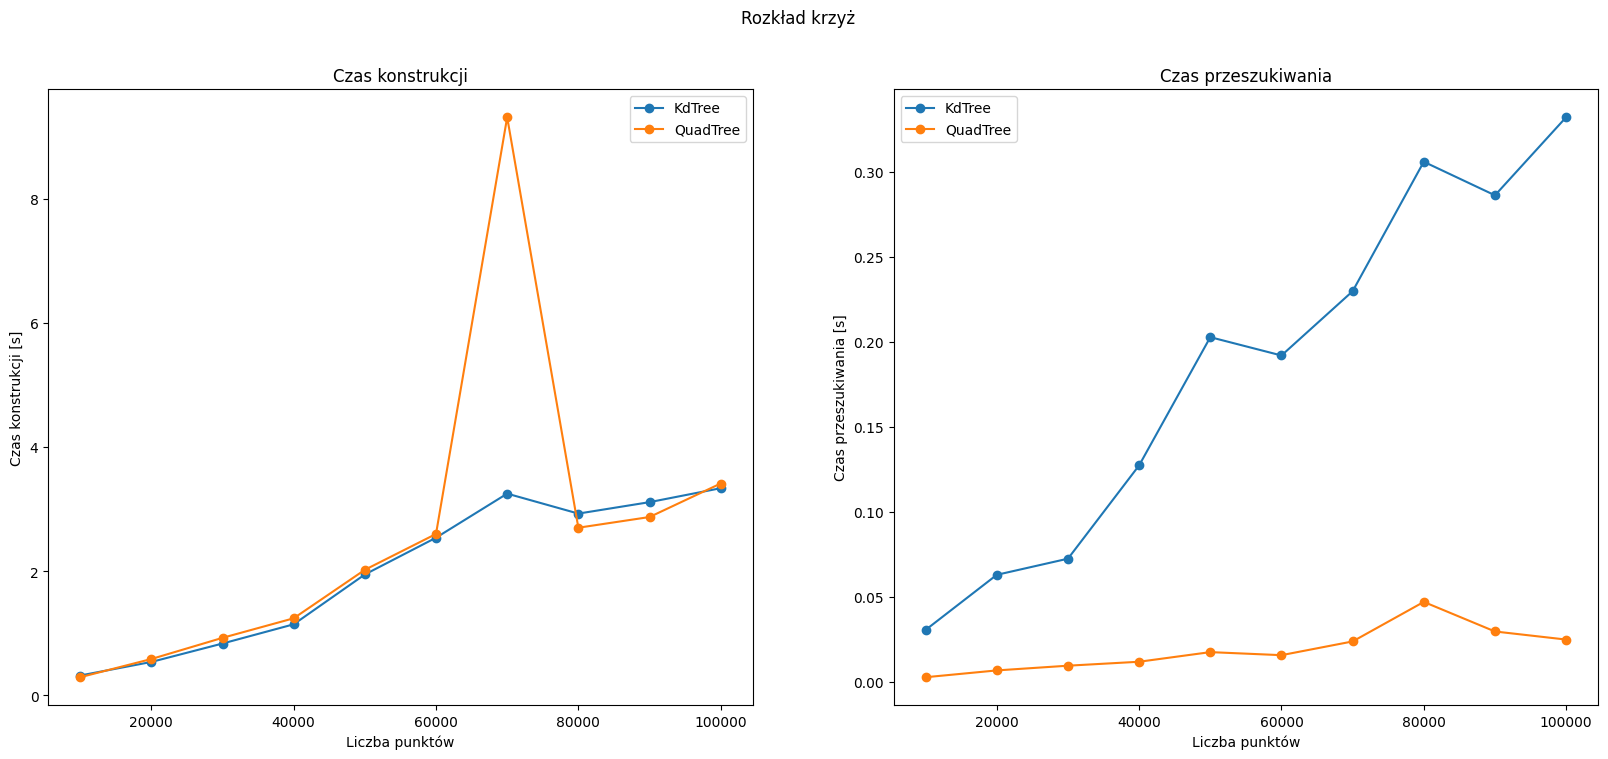

In [23]:
show_graphs(df6, "Rozkład krzyż")

3.7 Rozkład prostokątny

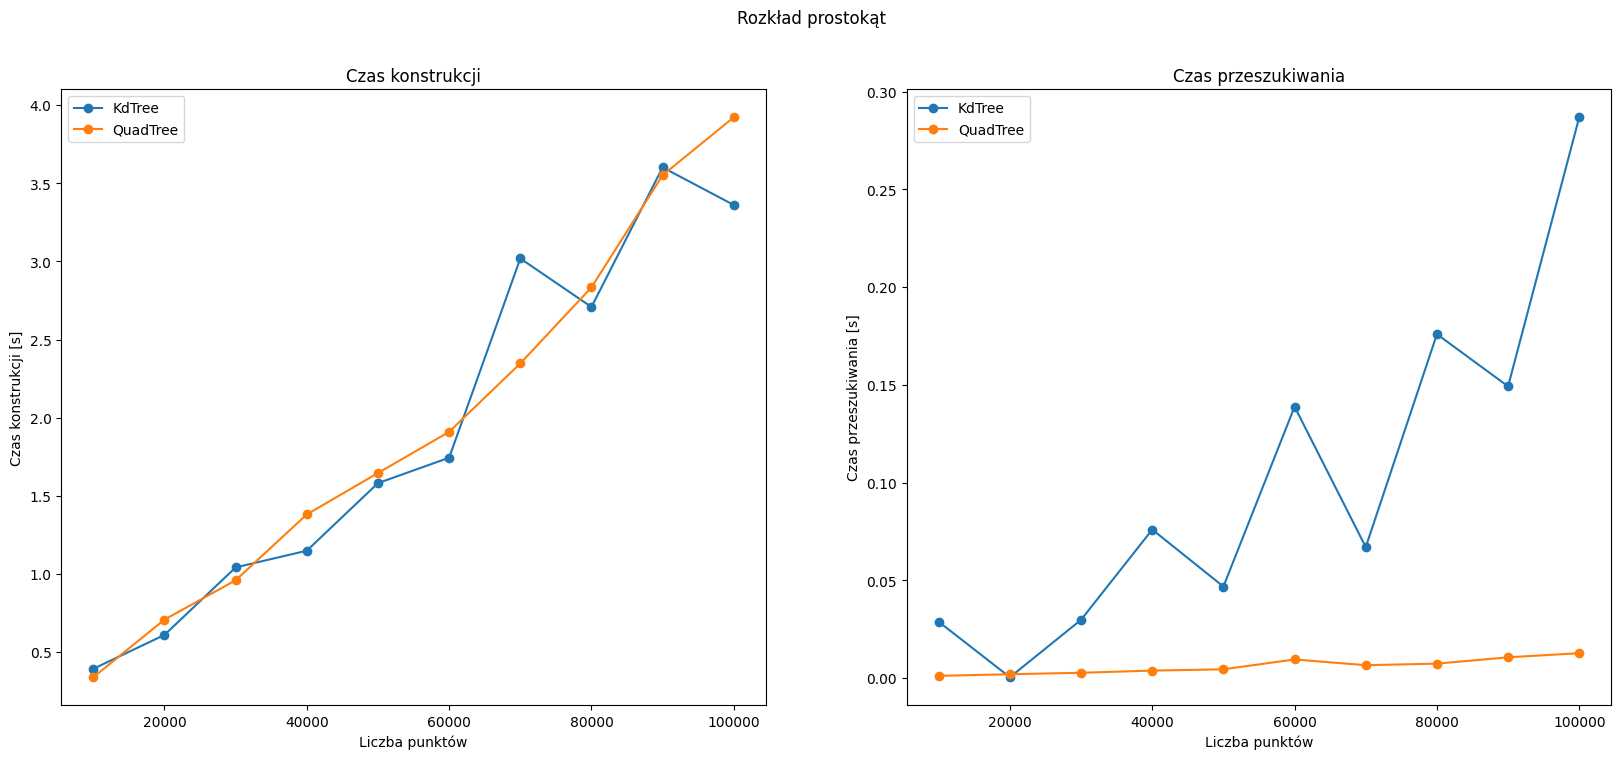

In [24]:
show_graphs(df7, "Rozkład prostokąt")

## 4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

4.1 Wydajność dla KDTree w zależności od ilości wymiarów

In [25]:
def kdim_compare():
    data = []
    for k in range(2, 51):
        points = cg.uniform_distribution(1000, Rectangle(Point([0 for _ in range(k)]), Point([100 for _ in range(k)])))
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=3)
        kd = KdTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(Rectangle([25 for _ in range(k)], [75 for _ in range(k)])), number=3)
        data.append([tkk, tks])
    top = ["Wydajność KdTree w zależności od ilości wymiarów"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(2, 51))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_kdim = kdim_compare()
df_kdim

Wydajność KdTree w zależności od ilości wymiarów                        
                               Czas konstrukcji [s] Czas przeszukiwania [s]
2                                          0.073286                0.009011
3                                          0.109836                0.005909
4                                          0.046537                0.010473
5                                          0.072853                0.015519
6                                          0.070417                0.019145
7                                          0.082808                0.028899
8                                          0.062018                0.020381
9                                          0.055098                0.020374
10                                         0.057220                0.024358
11                                         0.107493                0.044896
12                                         0.065083                0.019733
13                                         0.058599                0.020185
14                                         0.057124                0.026928
15                                         0.060500                0.020462
16                                         0.068675                0.020499
17                                         0.063605                0.020610
18                                         0.065199                0.021640
19                                         0.067112                0.024911
20                                         0.065614                0.022431
21                                         0.067730                0.023581
22                                         0.070038                0.025223
23                                         0.072332                0.022795
24                                         0.078913                0.026221
25                                         0.075849                0.023862
26                                         0.075814                0.027807
27                                         0.074807                0.024877
28                                         0.074626                0.026321
29                                         0.078112                0.030563
30                                         0.076984                0.028649
31                                         0.077867                0.028012
32                                         0.079139                0.027444
33                                         0.086616                0.028445
34                                         0.093781                0.026801
35                                         0.086521                0.028532
36                                         0.086777                0.028047
37                                         0.088641                0.030561
38                                         0.092082                0.030670
39                                         0.098722                0.030477
40                                         0.091375                0.029378
41                                         0.097455                0.029704
42                                         0.098088                0.031457
43                                         0.099594                0.033357
44                                         0.102049                0.033767
45                                         0.108264                0.033847
46                                         0.101406                0.033170
47                                         0.105839                0.034478
48                                         0.104684                0.033669
49                                         0.105302                0.033465
50                                         0.105554                0.035325

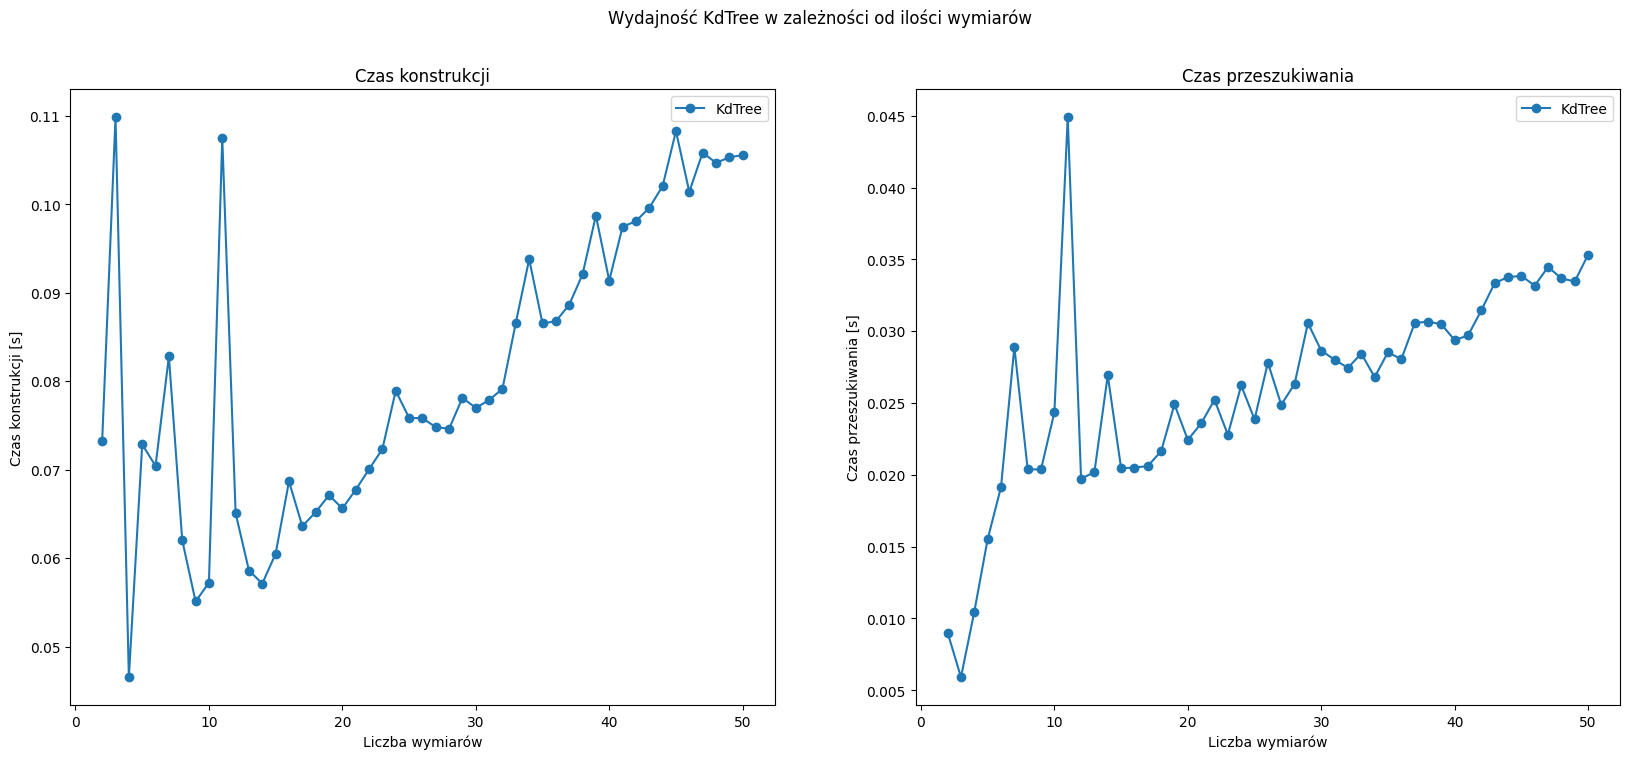

In [26]:
def kdim_graph(df, title = "Wydajność KdTree w zależności od ilości wymiarów"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="KdTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba wymiarów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="KdTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba wymiarów")
    ax2.legend()
    plt.show()

kdim_graph(df_kdim)

4.2 Wydajność dla QuadTree w zależności od wartości parametru `max_capacity`

In [27]:
def maxcap_compare():
    data = []
    for mc in range(1, 1001, 10):
        points = cg.uniform_distribution(5000, Rectangle(Point([0,0]), Point([100,100])))
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1, max_capacity=mc), number=2)
        qt = QuadTree(points, points_in_node=1, max_capacity=mc)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(Rectangle([25, 25], [75, 75])), number=2)
        data.append([tqk, tqs])
    top = ["Wydajność QuadTree w zależności od maksymalnej pojemności liścia"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, 1001, 10))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_maxcap = maxcap_compare()
df_maxcap

Wydajność QuadTree w zależności od maksymalnej pojemności liścia  \
                                                Czas konstrukcji [s]   
1                                             0.301193                 
11                                            0.060482                 
21                                            0.055929                 
31                                            0.048190                 
41                                            0.049426                 
..                                                 ...                 
951                                           0.042733                 
961                                           0.041092                 
971                                           0.037625                 
981                                           0.103301                 
991                                           0.038362                 

                             
    Czas przeszukiwania [s]  
1                  0.005327  
11                 0.003974  
21                 0.004703  
31                 0.007572  
41                 0.005799  
..                      ...  
951                0.017839  
961                0.018527  
971                0.017853  
981                0.018121  
991                0.017478  

[100 rows x 2 columns]

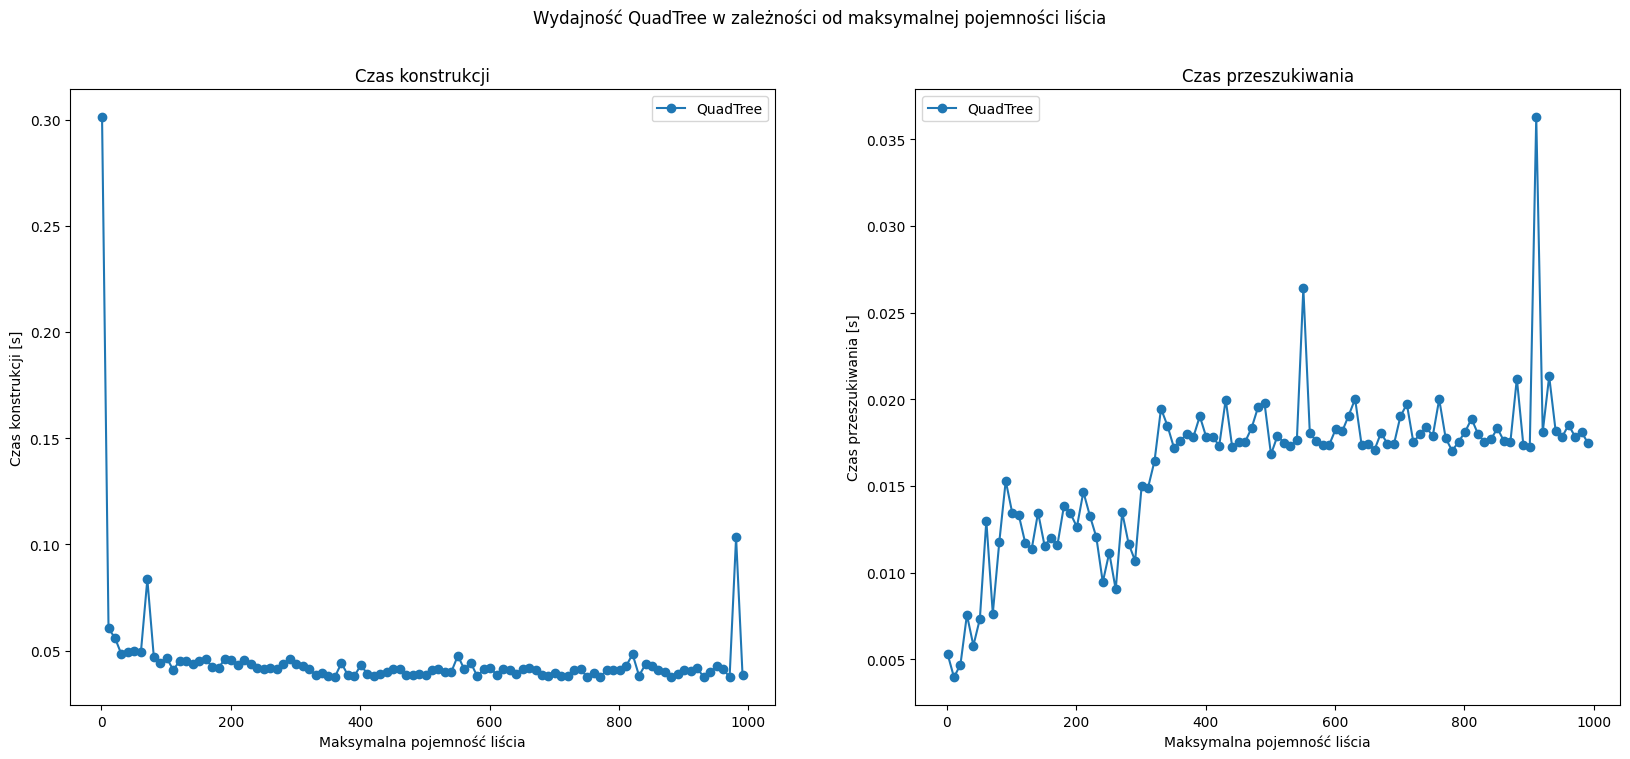

In [28]:
def maxcap_graph(df):
    title = "Wydajność QuadTree w zależności od maksymalnej pojemności liścia"
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Maksymalna pojemność liścia")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Maksymalna pojemność liścia")
    ax2.legend()
    plt.show()

maxcap_graph(df_maxcap)

## 5. Wizualizacja powyższych zbiorów, oraz siatki.

In [29]:
q_norm = 500
q_grid = (21,21)
q_clust = 165
q_out = (490, 10)
q_cross = (250,250)
def generate_visualization(func, quantity, shape,rec_for_search):
    vis_points = Visualizer()
    points = func(quantity,shape)
    vis_points.add_point(points)
    vis_KD = KdTree_visualizer(points, points_in_node=False, visualize_gif=False)
    vis_QT = QuadTree_visualizer(points, points_in_node=False, visualize_gif=False)
    _,vis_rec1 = vis_KD.search_in_rectangle(rec_for_search, visualize_gif=False)
    _,vis_rec2 = vis_QT.search_in_rectangle(rec_for_search, visualize_gif=False)
    vis_points.show()
    vis_KD.vis.show()
    vis_QT.vis.show()
    vis_rec1.show()
    vis_rec2.show()

5.1 Rozkład równomierny

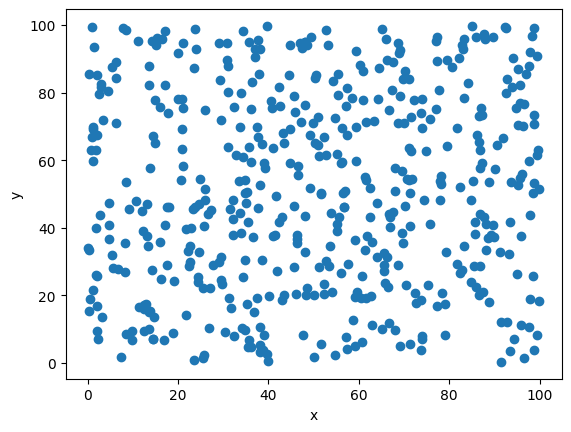

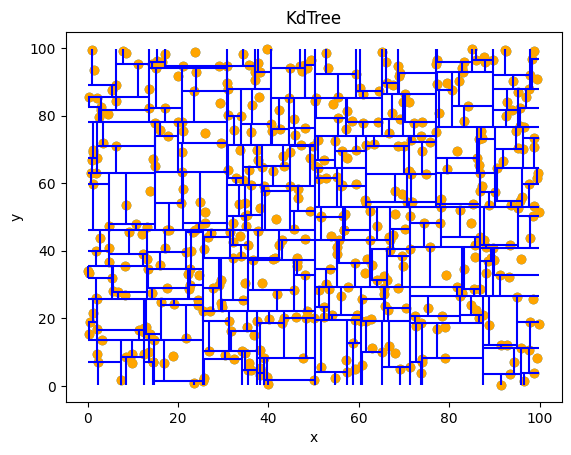

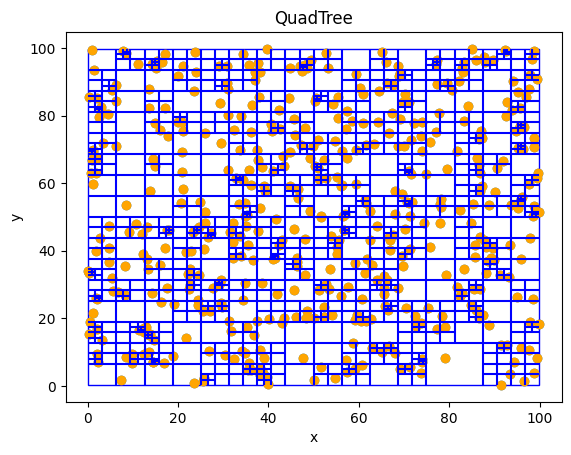

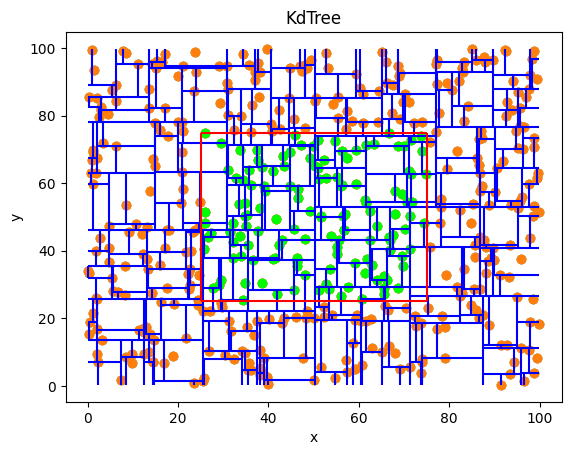

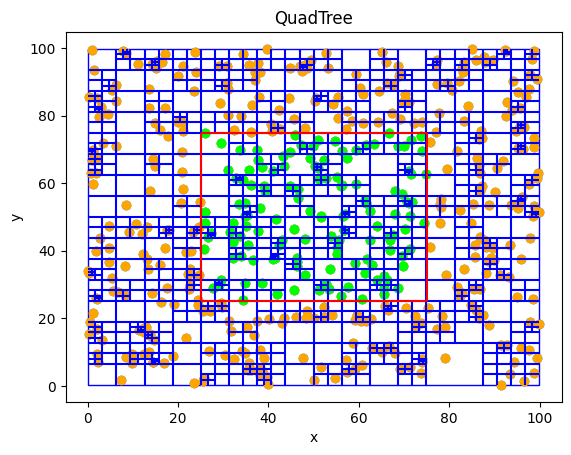

In [30]:
generate_visualization(cg.uniform_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.2 Rozkład normalny

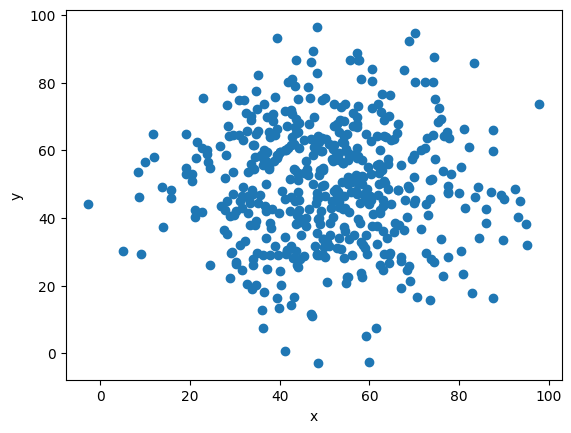

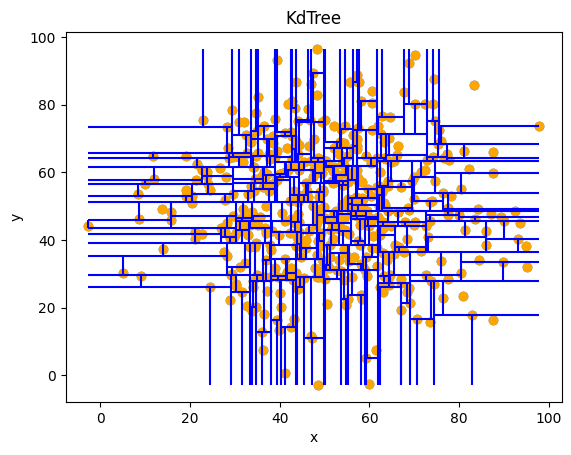

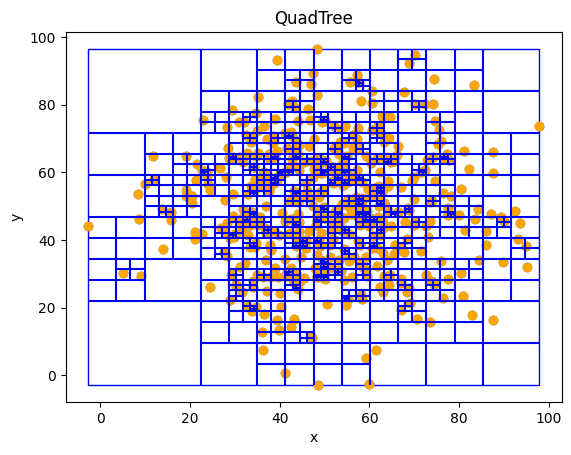

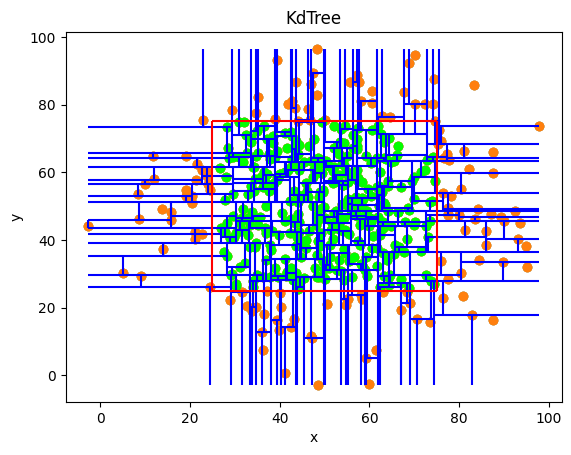

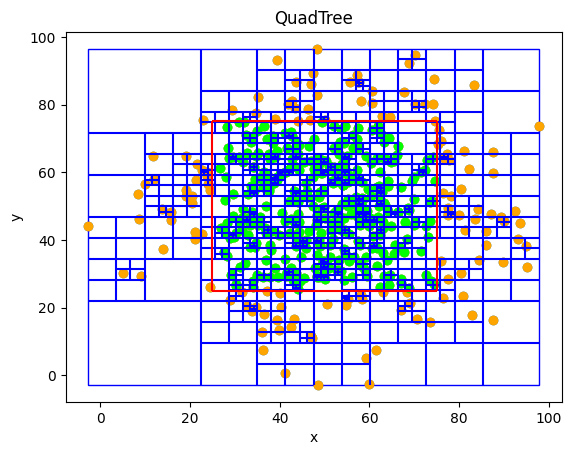

In [31]:
generate_visualization(cg.normal_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.3 Rozkład "posadzka"

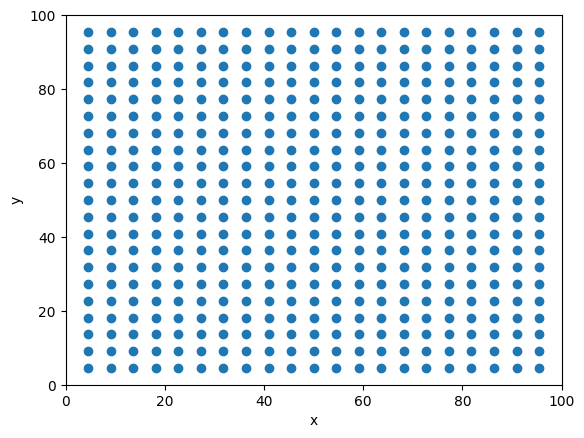

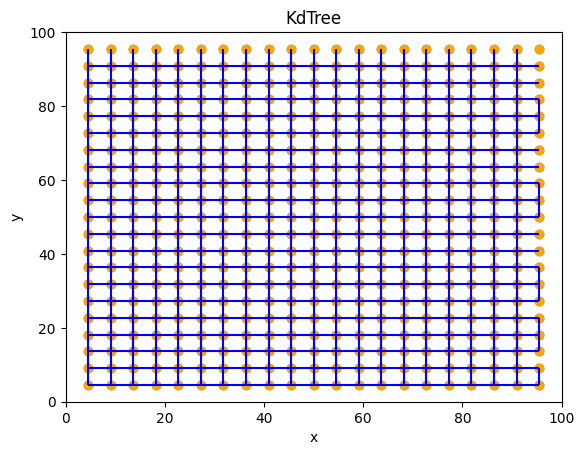

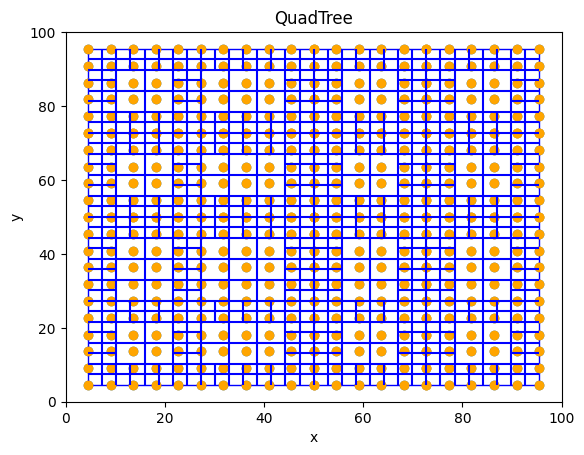

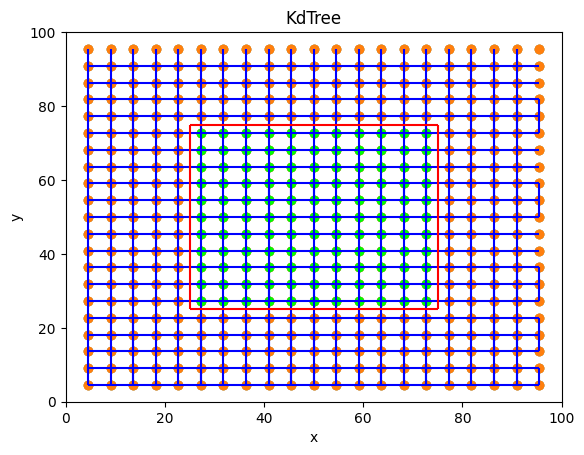

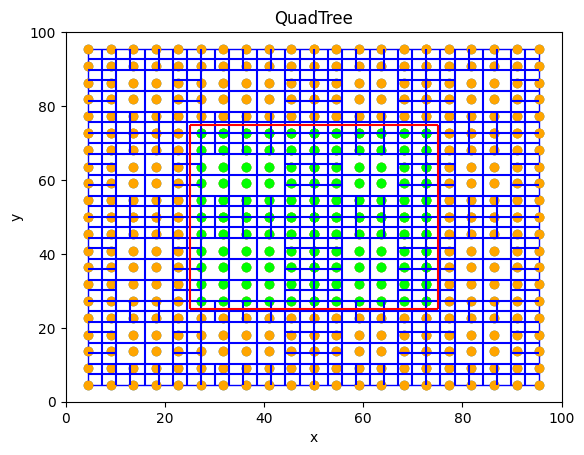

In [32]:
generate_visualization(cg.grid_distribution, q_grid, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.4.1 Rozkład klastrowy 1

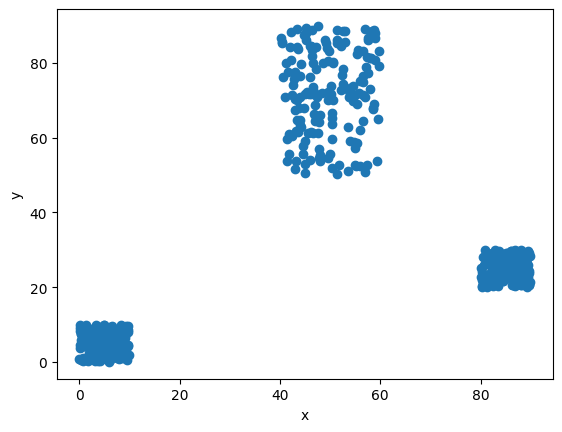

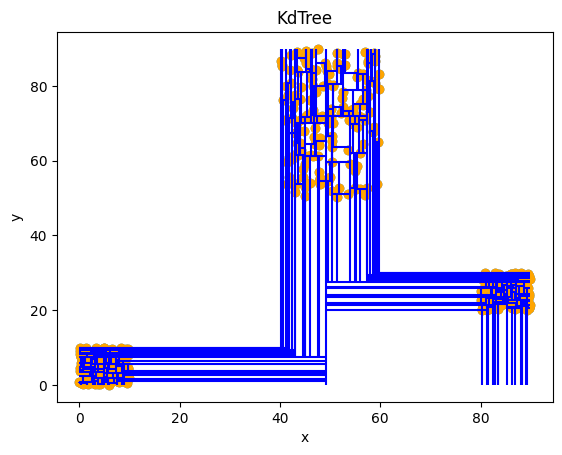

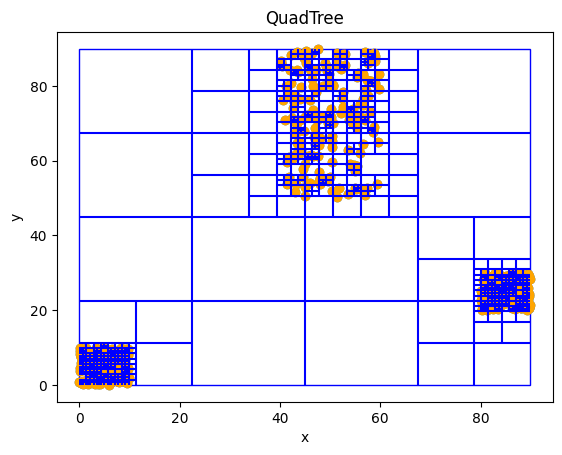

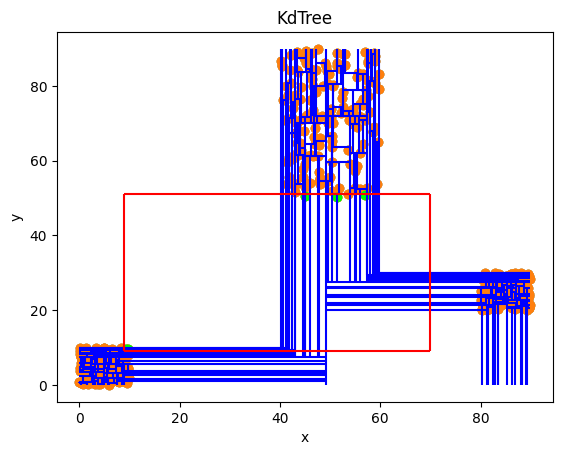

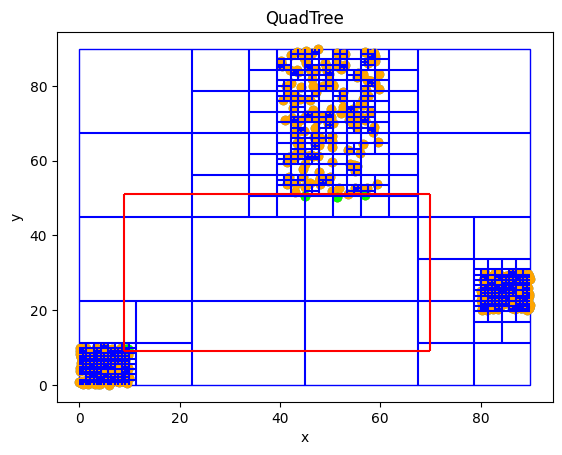

In [33]:
generate_visualization(cg.cluster_distribution, q_clust, (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30]))),Rectangle([9, 9], [70, 51]))

5.4.2 Rozkład klastrowy 2

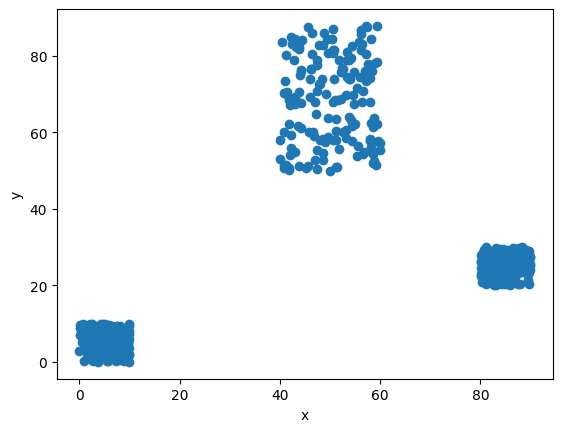

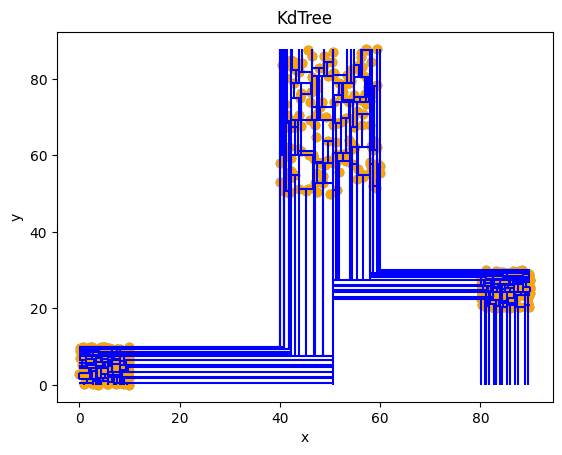

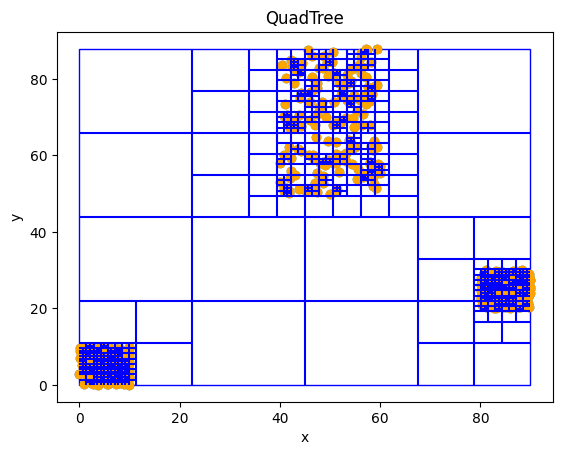

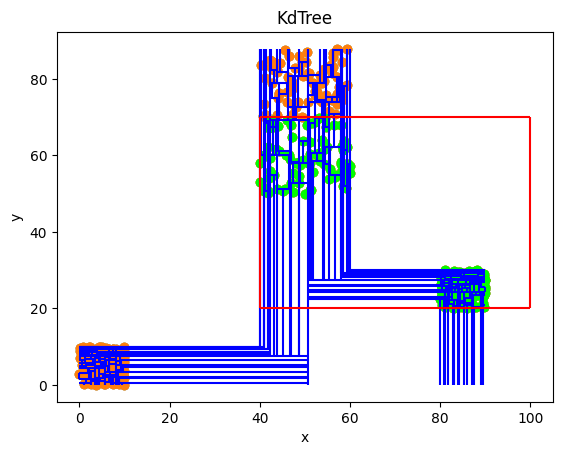

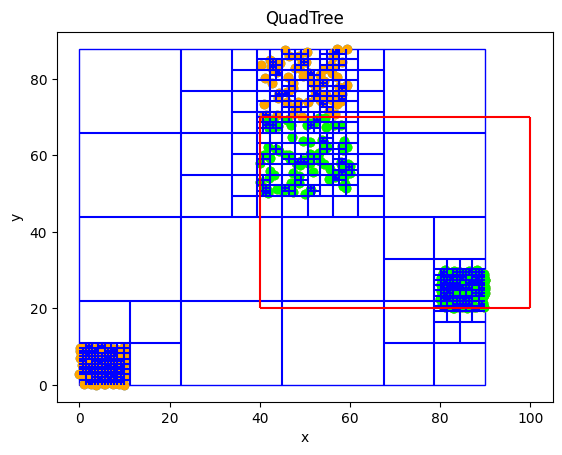

In [34]:
generate_visualization(cg.cluster_distribution, q_clust, (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30]))),Rectangle([40, 20], [100, 70]))

5.5.1 Rozkład z wartościami odstającymi 1

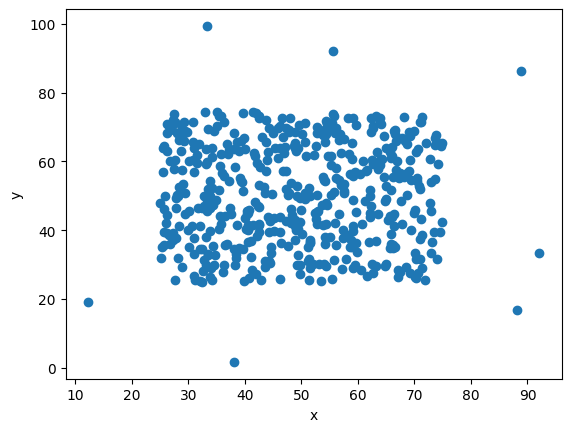

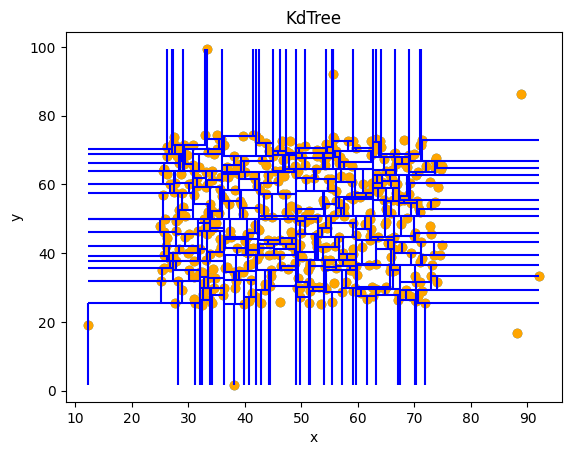

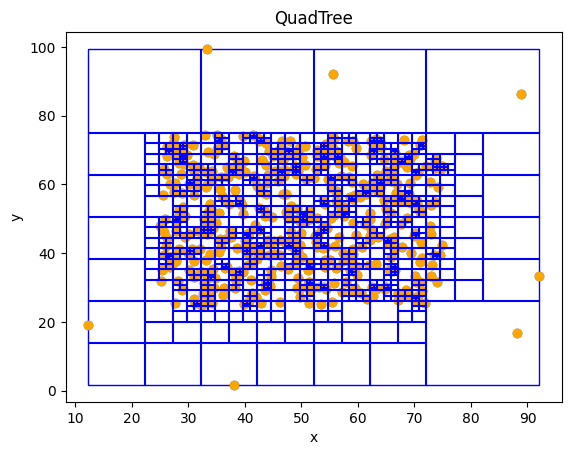

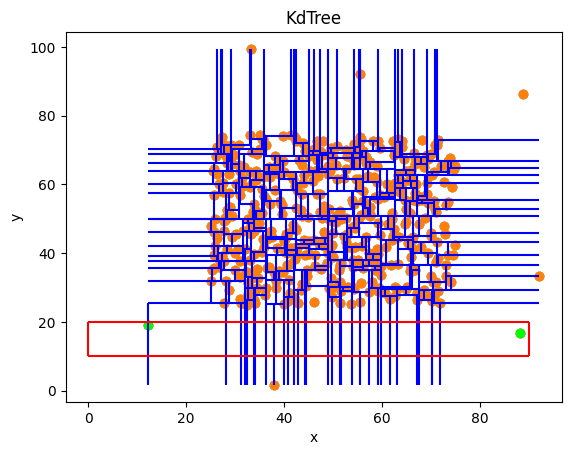

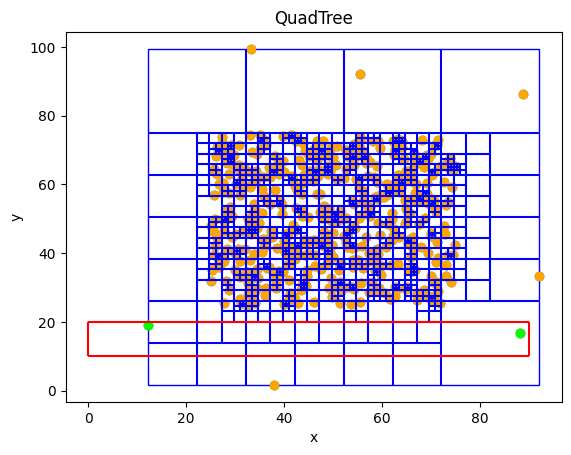

In [35]:
generate_visualization(cg.outliers_distribution, q_out, Rectangle(Point([0,0]), Point([100,100])),Rectangle([0,10], [90,20]))

5.5.2 Rozkład z wartościami odstającymi 2

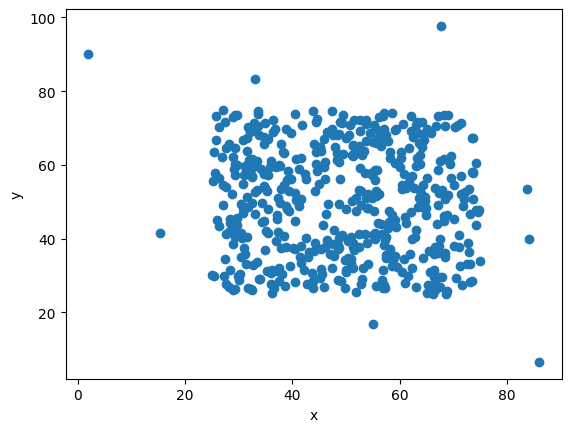

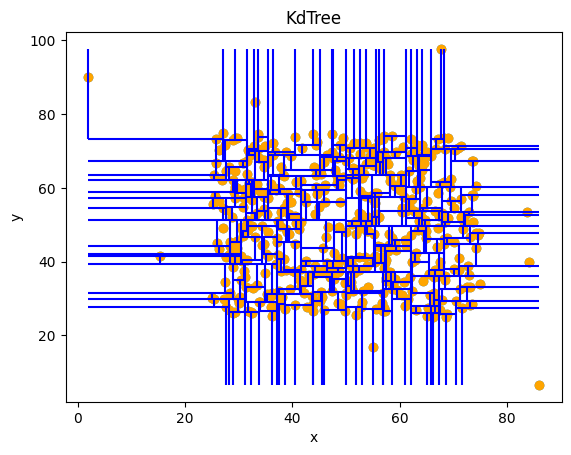

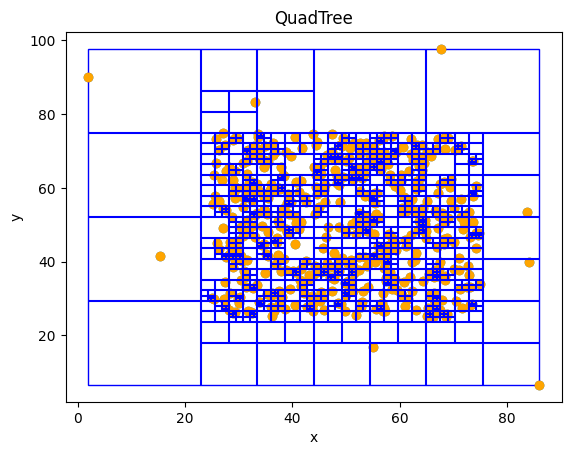

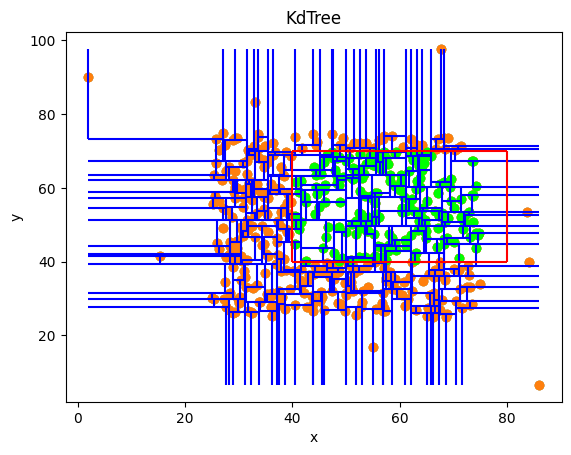

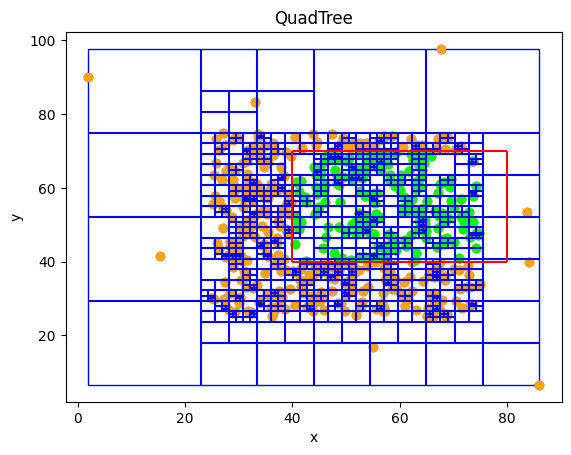

In [36]:
generate_visualization(cg.outliers_distribution, q_out, Rectangle(Point([0,0]), Point([100,100])),Rectangle([40,40], [80,70]))

5.6 Rozkład krzyżowy

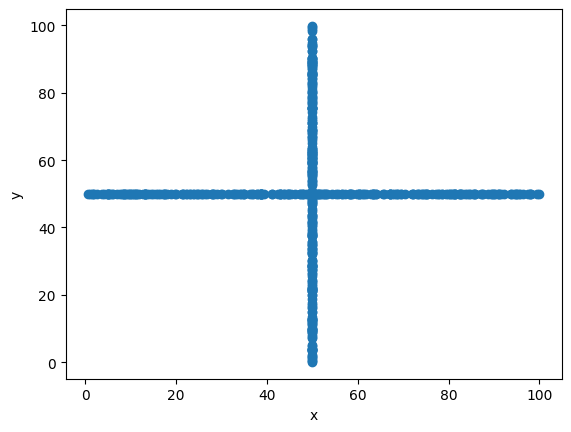

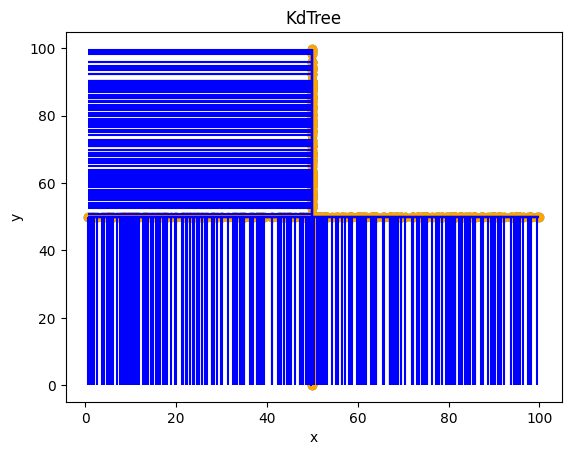

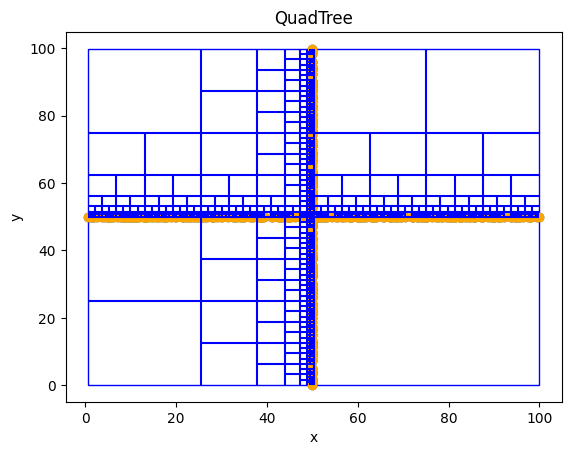

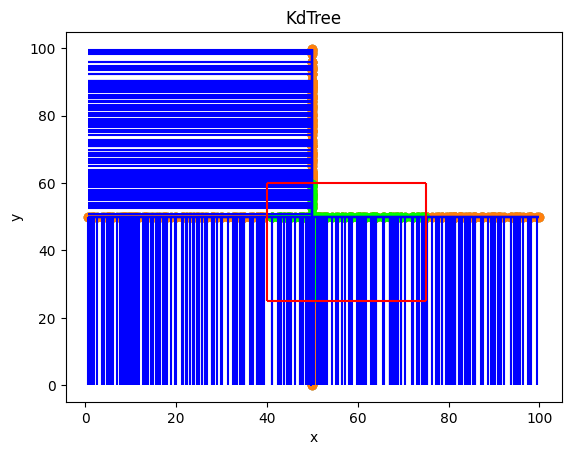

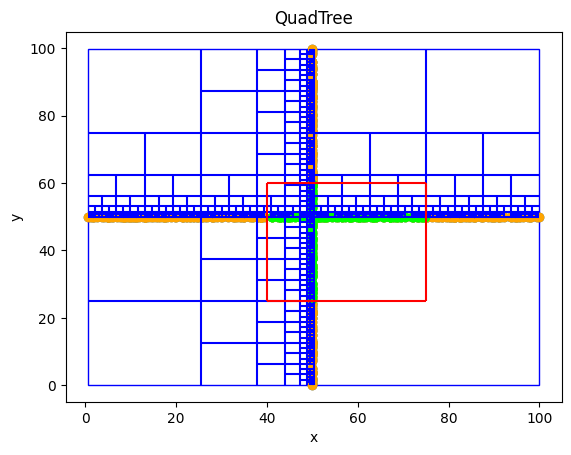

In [37]:
generate_visualization(cg.cross_distribution, q_cross, Rectangle(Point([0,0]), Point([100,100])),Rectangle([40,25], [75, 60]))

5.7 Rozkład prostokątny

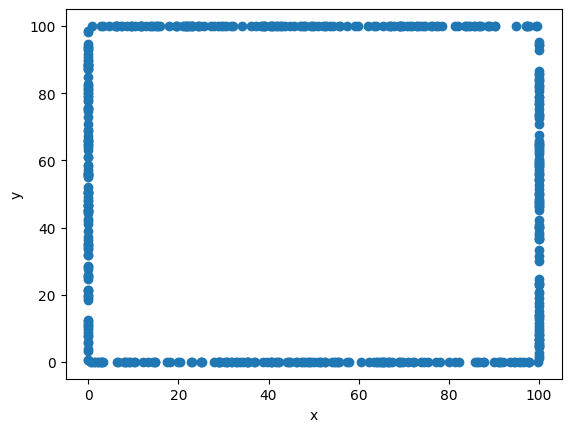

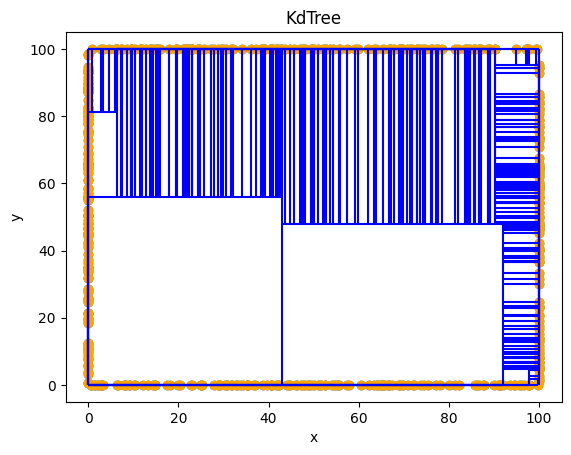

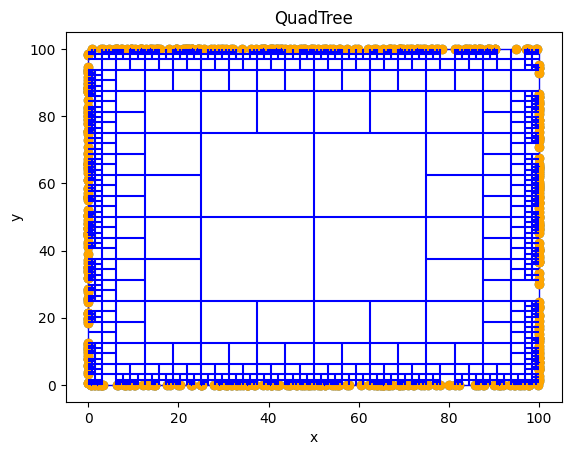

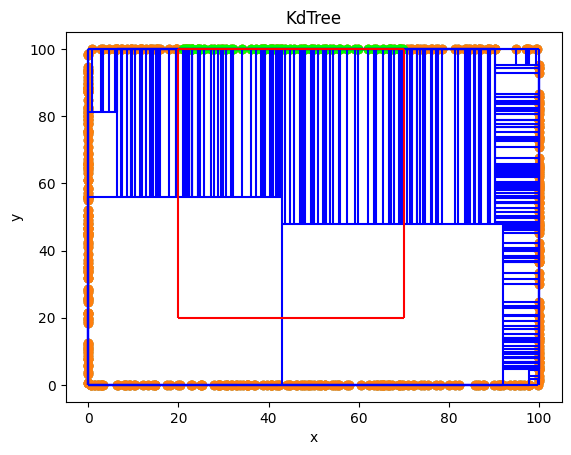

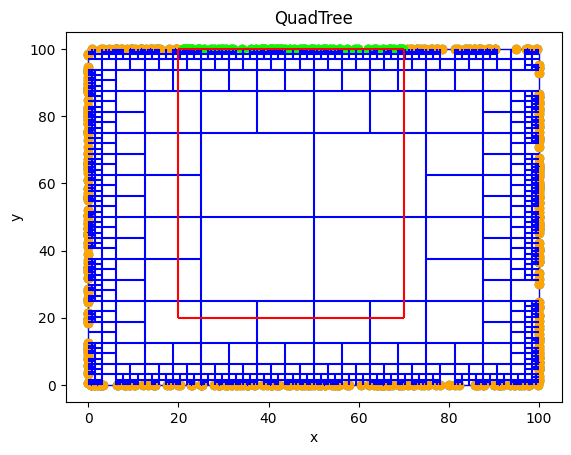

In [38]:
generate_visualization(cg.rectangle_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([20,20], [70,100]))

------------------------------------------------------------------------------------------------------------------------------------------------